# Differentiable Physics IV: Numerical Methods for Hyperbolic PDEs

Considering a second order PDE's:

$$A \frac{\partial ^ 2 u}{\partial x^2} + 2B \frac{\partial ^ 2 u}{\partial y \partial x} + C \frac{\partial ^ 2 u}{\partial y^2} = 0 $$

We can distinguish three cases, for each of which different numerial methods are applicable:

| Case | Name | Intuition | Numerical method | Example |
| --- | --- | --- | --- | --- |
| $B^2 - AC > 0$ | Elliptic | Equilibrium States <br/>--> no discontinuities  | Jacobi, SOR, FFT, Multigrid | Poisson Equation |
| $B^2 - AC = 0$ | Parabolic | Diffusion, Smoothing | Crank-Nicolson | Diffusion, Heat Equation |
| $B^2 - AC < 0$ | Hyperbolic | Waves | Lax, Upwind, Lax-Wendrof, Mac Cormack | Wave Equation |


We are going to focus on the hyperbolic case, because our main goal is to solve the navier stokes equations, which are hyperbolic.

Lets look at some of the numerical methods for hyperbolic PDEs:

| Method | Intuition | Example |
| --- | --- | --- |
| Lax | Explicit, first order in time and space | Wave Equation |
| Upwind | Explicit, first order in time and space | Wave Equation |
| Lax-Wendrof | Explicit, second order in time and space | Wave Equation |

## 1D Adevection & Upwind

$$\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0$$

Using finite differences, we can discretize the equation:

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + a \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$

And rearrange it to get the update rule:

$$u_i^{n+1} = u_i^n - \frac{a \Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

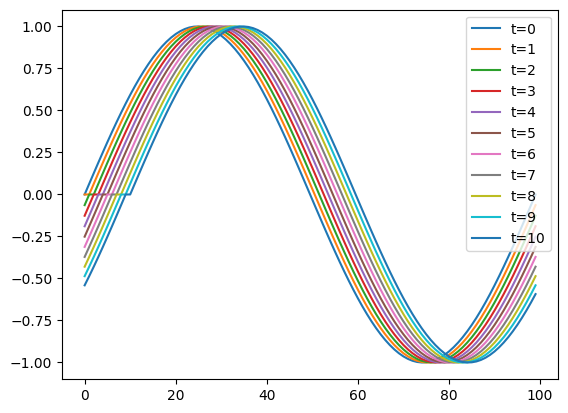

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def upwind_step(x : np.ndarray, dt : float, dx : float,  a : float) -> np.ndarray:
    return x - a * dt / dx * (x - np.roll(x, 1))
    
# simple wave for x
x = np.linspace(0, 1, 100)
x = np.sin(2 * np.pi * x * 1)

dt = 1
dx = 1
a = 1

xs = [x]
for i in range(10):
    x = upwind_step(x, dt, dx, a)
    xs.append(x)

for i, x in enumerate(xs):
    plt.plot(x, '-', label=f"t={i}")

plt.legend()